# Project :  Mall Customer Segmentation Analysis

Dataset link : https://www.kaggle.com/datasets/joebeachcapital/customer-segmentation

Date : 28/08/2023

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
mall = pd.read_csv("Mall_Customers.csv")

#data cloning
df = mall.copy(True)

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.set_index("CustomerID")


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking missing vlaue
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

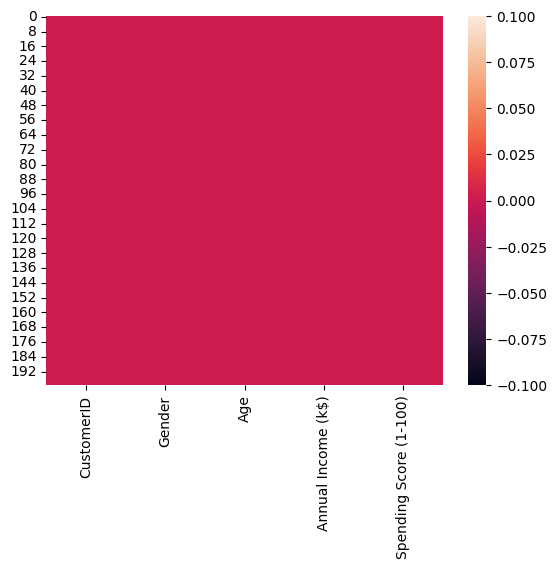

In [9]:
# visualizing the missing value
sns.heatmap(df.isna())
plt.show()

`Insight`

- There are **200 rows and 5 columns**.
- There are **no missing value** present in dataset.
- Our **Aim to anaysis of target variable (Spending Score)**.

## 2. Exploratory Data Analysis

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
#removing unnecessary columns
df.drop("CustomerID", axis=1, inplace=True)

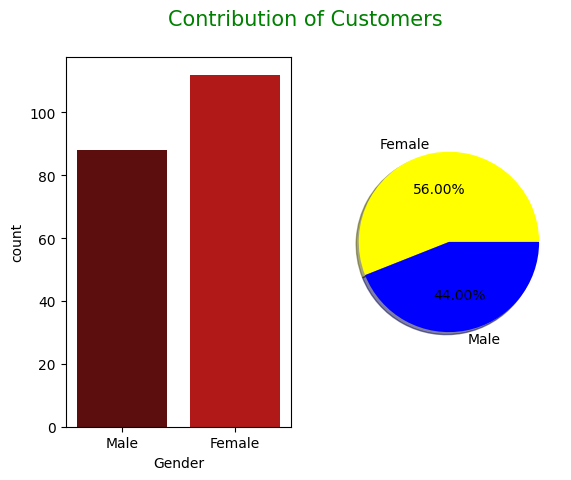

In [12]:
plt.suptitle("Contribution of Customers", color="g", size=15)
color = sns.set_palette("hot")
plt.subplot(1,2,1)
sns.countplot(df.Gender)

plt.subplot(1,2,2)
df.Gender.value_counts().plot.pie(autopct="%0.2f%%", colors= ["yellow","blue"],shadow=True)
plt.ylabel("")
plt.show()

`Insight`

- There are **56% Female Customer and 44% Male customer**. **Female customers more than Male customers**.

### 1. Analysing customer based on Gender

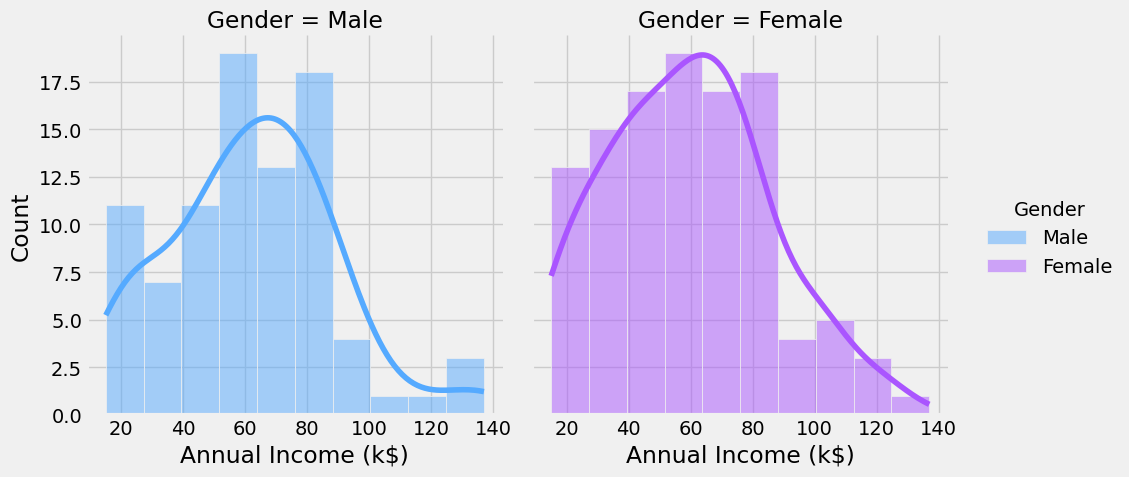

In [15]:
# Distribution of Income startified by Gender
plt.style.use('fivethirtyeight')
sns.displot(data=df, x="Annual Income (k$)", hue="Gender",palette="cool", col="Gender", kde=True)
plt.show()

`Insight`

- From hist plot, The **Annual Income of Female Customers are higher than Male Customers**. Majority Customers Annual Income from both Male and Female category are **(30k-90k)$** comparatively higher than Male customers 

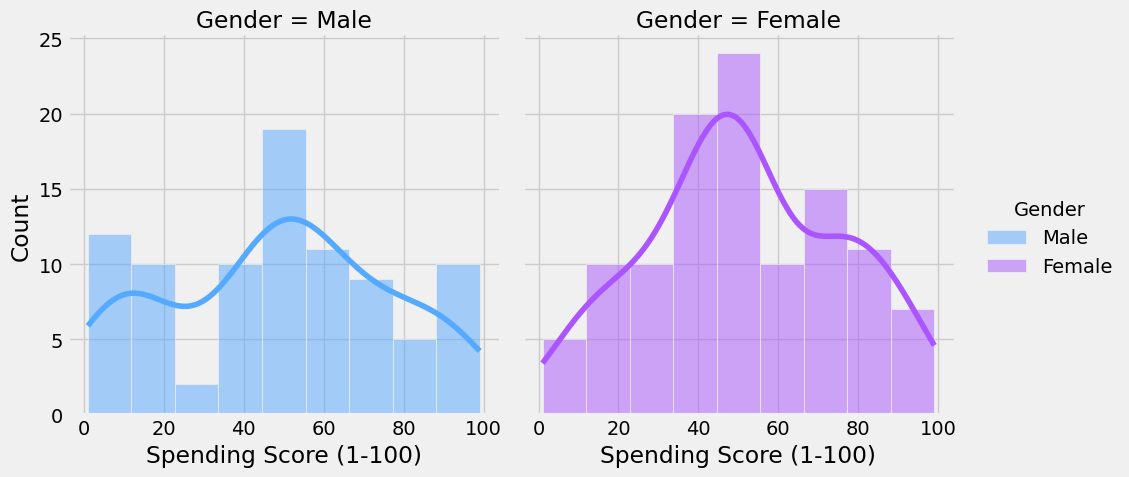

In [21]:
# Distribution of Spending Score startified by Gender
plt.style.use('fivethirtyeight')
sns.displot(data=df, x='Spending Score (1-100)', hue="Gender",palette="cool", col="Gender", kde=True)
plt.show()

`Insight`

- From hist plot, The **Spending Score of Female Customers are quantitively much higher than Male Customers**.

### 2. Analysing customer based on Age

38.85


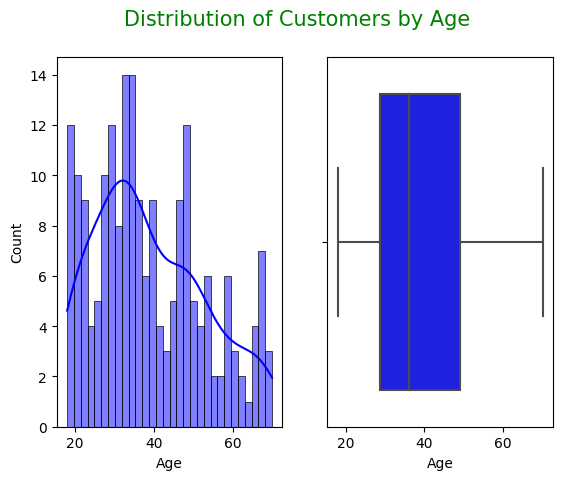

In [13]:
print(df.Age.mean())
plt.suptitle("Distribution of Customers by Age", color="g", size=15)
color = sns.set_palette("hot")
plt.subplot(1,2,1)
sns.histplot(df.Age, kde=True, color="b", bins=30)

plt.subplot(1,2,2)
sns.boxplot(df.Age, color="b")
plt.ylabel("")
plt.show()

`Insight`

- From the dataset, The **spending score of Customers who come from age group **22-42 are high**. Especially **age group from 30 to 40**.

### 3. Analysing All Variables

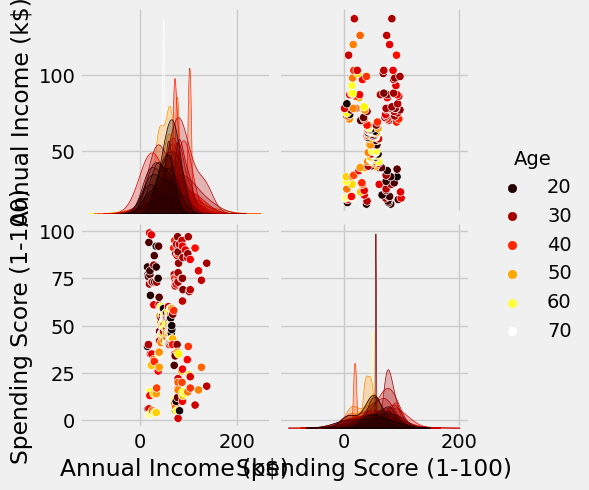

In [65]:
sns.pairplot(df, hue="Age", palette="hot")
plt.show()

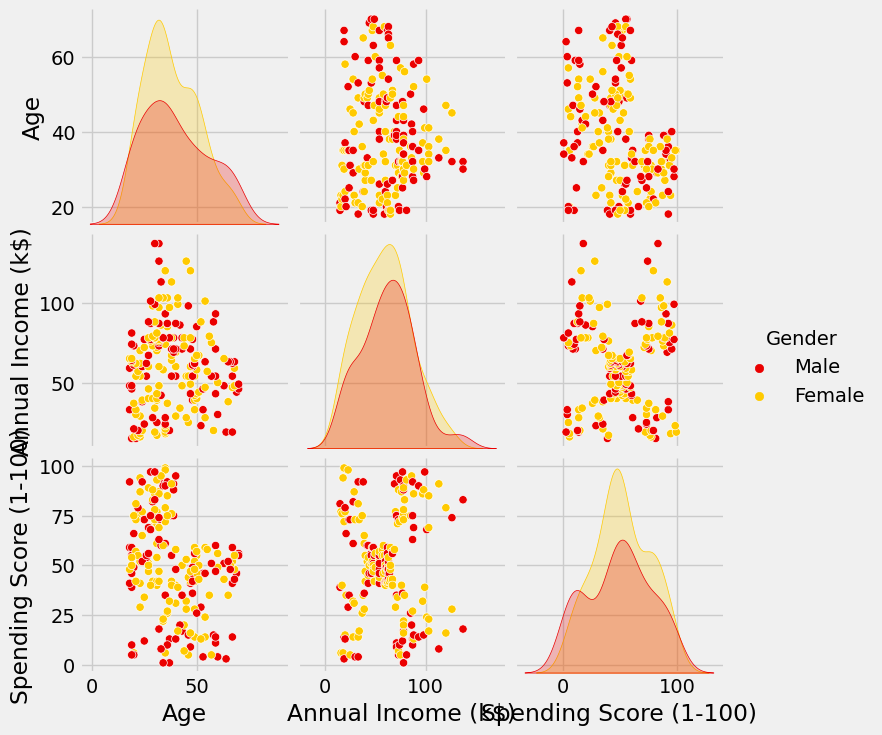

In [66]:
sns.pairplot(df, hue="Gender", palette="hot")
plt.show()

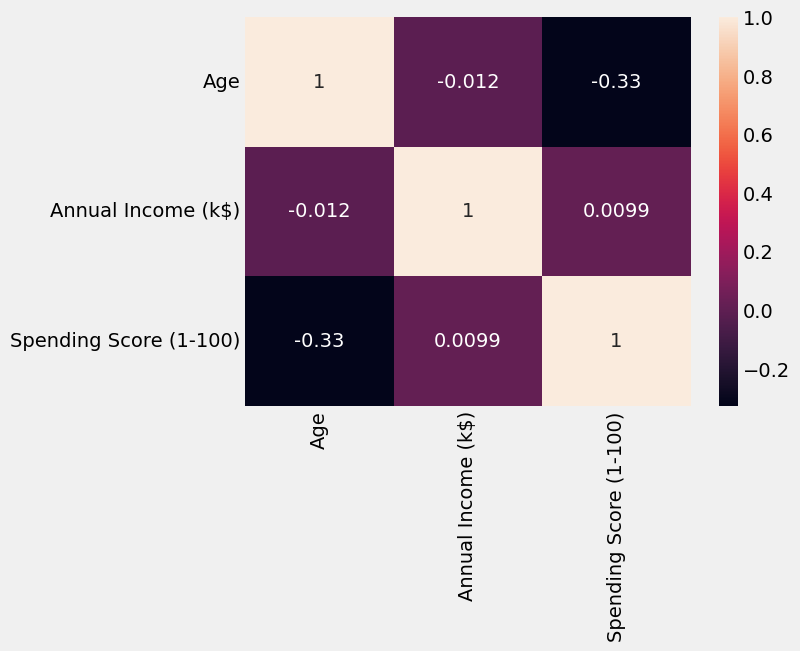

In [67]:
sns.heatmap(df.corr(), annot=True)
plt.show()

`Insight`

- From the Heatmap, We cam sau **Age is directly correleated with Age". So we can say **Age is directly correletd with Spending Score**.  

## 3. Performing Hypothesis Testing

In [ ]:
from scipy import stats

In [ ]:
# Perform student t-test for independence by gender

alpha = 0.05
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']
t_stat, p = stats.ttest_ind(female['Spending Score (1-100)'],male['Spending Score (1-100)'])
print('H0: There is no significant difference in spending score between genders \n')
print('t-statistic: ', t_stat)
print('p-value', p/2,'\n') # One-sided test
if p/2 < alpha:
    print('Reject H0 (Dependent)')
else:
    print('Do not reject H0 (Independent)')

## 4. Prediction Using KMeans Clustering

In [ ]:
# Scaling the values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score

In [ ]:
df2 = pd.get_dummies(df, drop_first=True)
df2
sc = StandardScaler()
df2 = sc.fit_transform(df2)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Elbow Method For finding optimum number of clusters

wss = [] # with in sum of square
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42)
    model = km.fit(df2)
    wss.append(model.inertia_)

In [ ]:
wss

In [ ]:
print("Optimum Number of Clusters")
plt.plot(range(1,10),wss)
plt.axvline(4,color='k')
plt.grid()
plt.show()

In [ ]:
# Silhoutte score for finding best number of clusters

score = []
for k in range(2,15):
    model=KMeans(n_clusters=k,random_state=42)
    labels=model.fit_predict(df2)
    scores = silhouette_score(df2,labels)
    score.append(scores)

In [ ]:
score

In [ ]:
score_df = pd.DataFrame({"clusters": range(2, 15), "silhouette_score":score })
score_df

In [ ]:
score_df.max()

In [ ]:
km = KMeans(n_clusters=14, random_state=42)
model=km.fit(df2)
model.labels_

## 5. Conclusion / Report

### > Important Information collected through datset are

- **There are female customers in majority. So we need to target female customers**.
- **Highest spending customers are come from age group 22-42.**
- The **Annual Income of Female Customers are higher than Male Customers**. Majority Customers Annual Income from both Male and Female category are **(30k-90k)$** comparatively higher than Male customers.
- **Spending score of female customers are much higher than male in quantitively**.
- **Spending score is corelleted with age**. This mean **Younger person spend more than older peoples.

### > Suggested Ideas

- **We need to more focus on female customers instead male customer**.
- **Target to customer from age group of **22-42**. More foucs on **Youger customers**. 
- **Annual Income and Spending score of female customers are higher than male customers.**

# Thankyou for Reading Notebook